In [1]:
import matplotlib.pyplot as plt 
from dataloader import InsectDatamodule
import numpy as np
import torchaudio
import torch
import IPython.display as ipd

In [2]:
datamodule = InsectDatamodule(csv_paths=['../data/Cicadidae.csv', '../data/Orthoptera.csv'], batch_size=10, eval_max_len_in_seconds=1)
train_dataloader = datamodule.train_dataloader()

metadata = train_dataloader.dataset.get_metadata()

In [3]:
# waveform, samplerate = train_dataloader.dataset.load_sample(metadata['path'][15])


# waveform.shape[1]

# torch.nn.functional.pad(waveform, pad=(waveform.shape[1]+500, 0, 0, 0))

tensor([[ 0.0000,  0.0000,  0.0000,  ..., -0.0007,  0.0167,  0.0074]])

In [8]:
def normalize(tensor):
    return (tensor - tensor.min()) / (tensor.max() - tensor.min())

# def normalize(tensor):
#     return (tensor + 40) / 40

def plot_all(path: str, n_fft: int, hop_length: int, win_length: int, n_mels: int, pad_length: int = 0):
    # loading the sample
    waveform, samplerate = train_dataloader.dataset.load_sample(path)

    ipd.display(ipd.Audio(waveform.numpy()[0], rate=samplerate))

    if pad_length > 0:
        # waveform = torch.nn.functional.pad(waveform, pad=(waveform.shape[1]+pad_length, 0, 0, 0))

        pad_samples = int(pad_length * samplerate)
        waveform = torch.nn.functional.pad(waveform, pad=(pad_samples, 0, 0, 0))

    # Create a time array
    time = np.arange(0, len(waveform[0])) / samplerate

    plt.plot(time, waveform[0, :])
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.show()

    # creating the mel spectrogram
    mel = torchaudio.transforms.MelSpectrogram(n_fft=n_fft, 
                                            hop_length=hop_length, 
                                            win_length=win_length, 
                                            n_mels=n_mels
                                            )(waveform)

    # transforming the mel spectrogram with amplitude to db
    mel_db = torchaudio.transforms.AmplitudeToDB()(mel)

    # normalizing the transformed mel spectrogram
    mel_db_norm = normalize(mel_db)

    # creating the spectrogram
    spec = torchaudio.transforms.Spectrogram(n_fft=n_fft, 
                                            hop_length=hop_length, 
                                            win_length=win_length
                                            )(waveform)

    # transforming the spectrogram with amplitude to db
    spec_db = torchaudio.transforms.AmplitudeToDB()(spec)

    # normalizing the transformed spectrogram
    spec_db_norm = normalize(spec_db)

    #setting up the plot
    fig, ax = plt.subplots(2, 3, figsize=(15, 10))

    # plotting subplots
    ax[0, 0].imshow(mel.numpy().squeeze(), origin='lower', aspect='auto')
    ax[0, 0].set_title('Mel spectrogram')
    fig.colorbar(ax[0, 0].imshow(mel.numpy().squeeze(), origin='lower', aspect='auto'), ax=ax[0, 0])

    ax[0, 1].imshow(mel_db.numpy().squeeze(), origin='lower', aspect='auto')
    ax[0, 1].set_title('Mel spectrogram (db)')
    fig.colorbar(ax[0, 1].imshow(mel_db.numpy().squeeze(), origin='lower', aspect='auto'), ax=ax[0, 1])

    ax[0, 2].imshow(mel_db_norm.numpy().squeeze(), origin='lower', aspect='auto')
    ax[0, 2].set_title('Mel spectrogram (db) normalized')
    fig.colorbar(ax[0, 2].imshow(mel_db_norm.numpy().squeeze(), origin='lower', aspect='auto'), ax=ax[0, 2])

    ax[1, 0].imshow(spec.numpy().squeeze(), origin='lower', aspect='auto')
    ax[1, 0].set_title('Spectrogram')
    fig.colorbar(ax[1, 0].imshow(spec.numpy().squeeze(), origin='lower', aspect='auto'), ax=ax[1, 0])

    ax[1, 1].imshow(spec_db.numpy().squeeze(), origin='lower', aspect='auto')
    ax[1, 1].set_title('Spectrogram (db)')
    fig.colorbar(ax[1, 1].imshow(spec_db.numpy().squeeze(), origin='lower', aspect='auto'), ax=ax[1, 1])

    ax[1, 2].imshow(spec_db_norm.numpy().squeeze(), origin='lower', aspect='auto')
    ax[1, 2].set_title('Spectrogram (db) normalized')
    fig.colorbar(ax[1, 2].imshow(spec_db_norm.numpy().squeeze(), origin='lower', aspect='auto'), ax=ax[1, 2])

    # displaying the plot
    plt.tight_layout()
    plt.show()

In [5]:
metadata

,family,species,class_id,data_set,file_length,path
0,Platypleurasp10_MHV%20313%20P.sp10%20Die%20Koo...,Platypleurasp10,24,train,3.242449,../data/Cicadidae/Platypleurasp10/Platypleuras...
1,Platypleuraintercapedinis_MHV%20952%20P.cf_.br...,Platypleuraintercapedinis,21,train,10.000000,../data/Cicadidae/Platypleuraintercapedinis/Pl...
2,Myopsaltaxerograsidia_Myopsalta_xerograsidia_L...,Myopsaltaxerograsidia,10,train,10.000000,../data/Cicadidae/Myopsaltaxerograsidia/Myopsa...
3,Brevisianabrevis_MHV%20959%20B.brevis%20Mornin...,Brevisianabrevis,1,train,10.000000,../data/Cicadidae/Brevisianabrevis/Brevisianab...
4,Platypleuradeusta_MHV%20993%20P.duesta%20nr%20...,Platypleuradeusta,17,train,10.000000,../data/Cicadidae/Platypleuradeusta/Platypleur...
...,...,...,...,...,...,...
201,Nemobiussylvestris_dat004-031.M.wav,Nemobiussylvestris,11,train,8.080544,../data/Orthoptera/Nemobiussylvestris/Nemobius...
202,Roeselianaroeselii_ROEROE_20200811_113904.M.wav,Roeselianaroeselii,30,train,7.890862,../data/Orthoptera/Roeselianaroeselii/Roeselia...
203,Tettigoniaviridissima_dat020-004.M.wav,Tettigoniaviridissima,31,train,3.706621,../data/Orthoptera/Tettigoniaviridissima/Tetti...
204,Nemobiussylvestris_dat016-020.wav,Nemobiussylvestris,11,train,4.295692,../data/Orthoptera/Nemobiussylvestris/Nemobius...


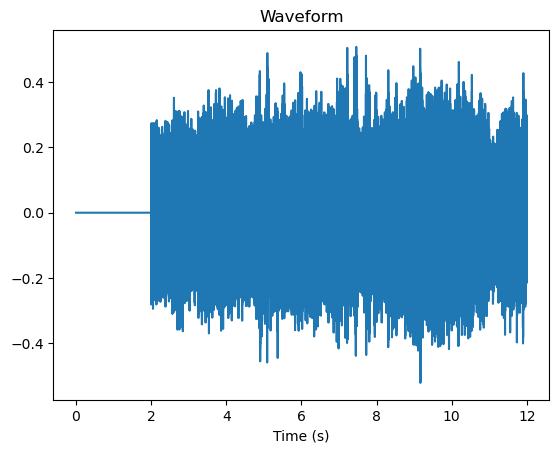

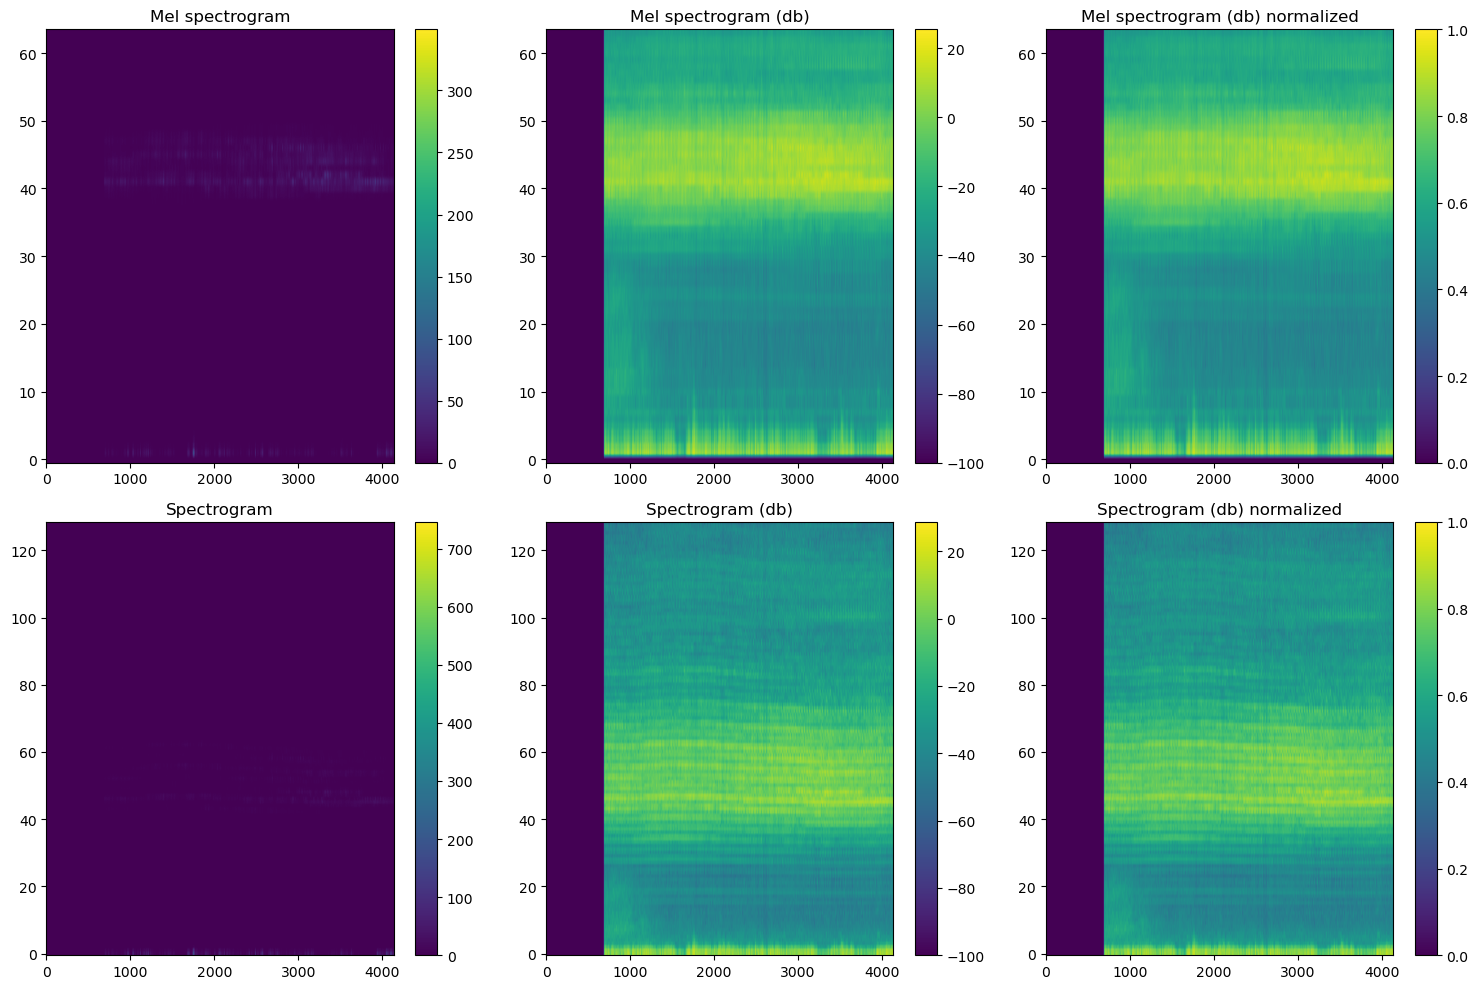

In [9]:
path = metadata['path'][55]

# setting up the parameters
n_fft = 256
hop_length =  128
win_length = 256
n_mels = 64
pad_length = 2

plot_all(path=path, n_fft=n_fft, hop_length=hop_length, win_length=win_length, n_mels=n_mels, pad_length=pad_length)

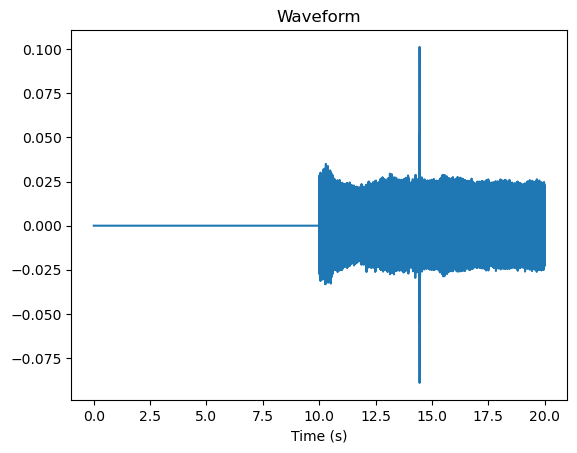

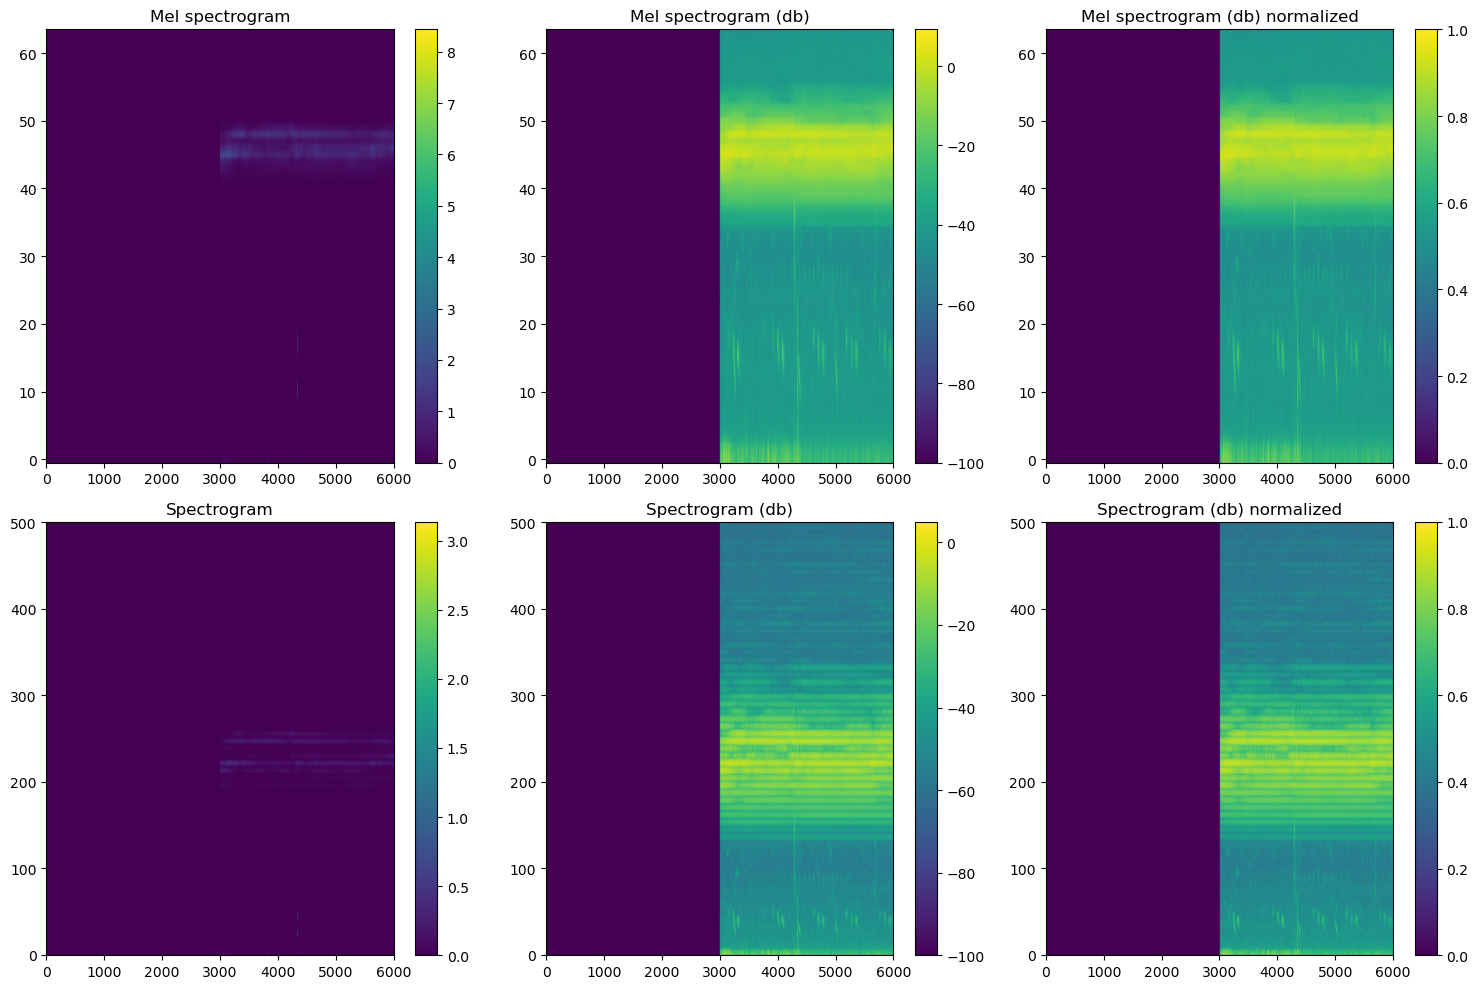

In [7]:
path = metadata['path'][15]

# setting up the parameters
n_fft = 1000
hop_length =  147
win_length = int(hop_length * 2)
n_mels = 64
pad = 1000


plot_all(path=path, n_fft=n_fft, hop_length=hop_length, win_length=win_length, n_mels=n_mels, pad_length=pad_length)